<a href="https://colab.research.google.com/github/NeelanjanaRai/2D-Barcode-Detection-and-Decoding/blob/main/2D_Barcode_Detection_and_Decoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Installing Required Libraries

In [1]:

!pip install ultralytics opencv-python-headless pyzbar --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 14.0 MB/s eta 0:00:00


Step 2: Uploading Dataset

In [3]:
from google.colab import files
import zipfile
import os


uploaded = files.upload()  # Upload a zip file containing your dataset


for filename in uploaded.keys():
    dataset_zip = filename

!mkdir -p dataset
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset')


dataset_path = 'dataset'
image_files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(('.jpg', '.png'))]
print(f"Found {len(image_files)} images in the dataset.")


Saving 0.zip to 0.zip
Found 44 images in the dataset.


Step 3: Loading YOLOv8 Model

In [4]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 77.4MB/s]


In [6]:
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

Step 4: Performing Barcode Detection and Decoding

In [8]:
import cv2
from pyzbar.pyzbar import decode

# Perform barcode detection and decoding
for img_file in image_files:
    # Load image
    image = cv2.imread(img_file)

    # Detect barcodes using YOLOv8
    results = model(image)

    # Access the first element of the results list (assuming single image prediction)
    results = results[0]

    # Process detected regions
    for box in results.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)  # Bounding box coordinates
        cropped = image[y1:y2, x1:x2]  # Crop detected region

        # Decode barcode using pyzbar
        decoded_objects = decode(cropped)
        for obj in decoded_objects:
            print(f"File: {os.path.basename(img_file)}")
            print(f"Decoded Data: {obj.data.decode('utf-8')}")
            print(f"Barcode Type: {obj.type}")
            print('-' * 30)


0: 384x640 2 persons, 1 bottle, 1 cup, 164.4ms
Speed: 6.4ms preprocess, 164.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 143.5ms
Speed: 4.6ms preprocess, 143.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 airplane, 1 toothbrush, 151.9ms
Speed: 3.7ms preprocess, 151.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 180.1ms
Speed: 4.8ms preprocess, 180.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 skateboard, 142.4ms
Speed: 3.0ms preprocess, 142.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 146.1ms
Speed: 3.2ms preprocess, 146.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 145.4ms
Speed: 3.8ms preprocess, 145.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons,

Step 5: Visualizing Results


0: 384x640 2 persons, 1 bottle, 1 cup, 147.3ms
Speed: 3.6ms preprocess, 147.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


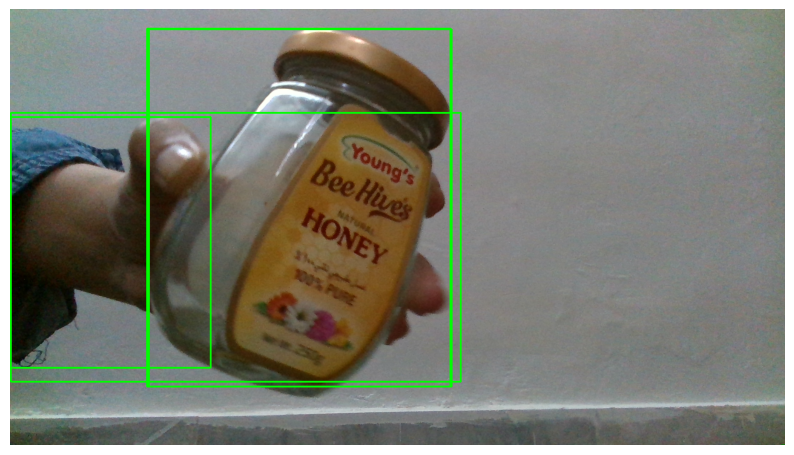

In [10]:
import matplotlib.pyplot as plt


def visualize_detections(image, results):

    results = results[0]
    for box in results.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


test_image = cv2.imread(image_files[0])
test_results = model(test_image)
visualize_detections(test_image, test_results)

